### importing libraries

In [11]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.naive_bayes import MultinomialNB
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.model_selection import train_test_split
from wordcloud import WordCloud

%matplotlib inline

### reading the csv, dropping the waste columns and renaming the remaining columns

In [12]:
sms = pd.read_csv('spam.csv',encoding='ISO-8859-1')
cols_to_drop = ['Unnamed: 2','Unnamed: 3','Unnamed: 4']
sms.drop(cols_to_drop,axis=1,inplace=True)
sms.columns = ['label','message']

In [14]:
sms.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5572 entries, 0 to 5571
Data columns (total 2 columns):
label      5572 non-null object
message    5572 non-null object
dtypes: object(2)
memory usage: 87.2+ KB


### converting words into vectors and splitting data into train/test

In [4]:
cv = CountVectorizer(decode_error='ignore')
X = cv.fit_transform(sms['message'])

X_train, X_test, y_train, y_test = train_test_split(X, sms['label'], test_size=0.3, random_state=101)

mnb = MultinomialNB()
mnb.fit(X_train,y_train)
print('training accuracy is --> ',mnb.score(X_train,y_train)*100)
print('test accuracy is --> ',mnb.score(X_test,y_test)*100)

training accuracy is -->  99.41025641025641
test accuracy is -->  98.56459330143541


In [5]:
def visualize(label):
    words = ''
    for msg in sms[sms['label']==label]['message']:
        msg = msg.lower()
        words+=msg + ' '
    wordcloud = WordCloud(width=600,height=400).generate(words)
    plt.imshow(wordcloud)
    plt.axis('off')

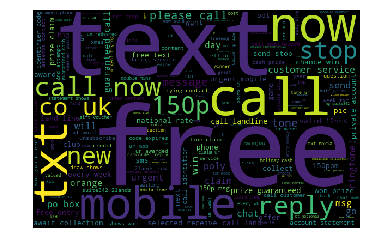

In [6]:
visualize('spam')

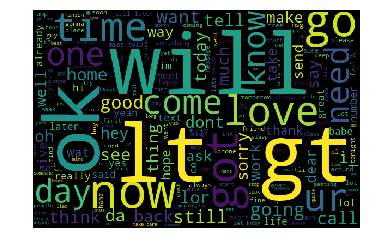

In [15]:
visualize('ham')

### live predictor 

In [10]:
# just type in your message and run
your_message = 'please bring veggies on your way back home '
your_message = cv.transform([your_message])
claass = mnb.predict(your_message)
print(claass[0])

ham
